<a href="https://colab.research.google.com/github/TruongTrungQuan20146404/Truong_Trung_Quan_20146404/blob/main/BT_Nhandientien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/train3 ',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 246 images belonging to 6 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/validation3',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 60 images belonging to 6 classes.


In [ ]:
training_data.class_indices

{'100k': 0, '10k': 1, '20k': 2, '500k': 3, '50k': 4, '5k': 5}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột(lớp CNN1)
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột(lớp CNN2 )
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột(lớp CNN3 )
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
#Chuyển dữ liệu mạng đầu ra của CNN từ mảng 2 chiều thành mảng 1 chiều
model.add(Flatten())
#Lớp ẩn
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
#Lớp output 
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_data,epochs=50,batch_size=150,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
8/8 [==============================] - 106s 13s/step - loss: 3.1965 - accuracy: 0.1870 - val_loss: 1.8035 - val_accuracy: 0.1667
Epoch 2/50
8/8 [==============================] - 33s 4s/step - loss: 1.7794 - accuracy: 0.1992 - val_loss: 1.8023 - val_accuracy: 0.1667
Epoch 3/50
8/8 [==============================] - 32s 4s/step - loss: 1.7497 - accuracy: 0.2033 - val_loss: 1.7789 - val_accuracy: 0.1667
Epoch 4/50
8/8 [==============================] - 32s 4s/step - loss: 1.6408 - accuracy: 0.3537 - val_loss: 1.6886 - val_accuracy: 0.3000
Epoch 5/50
8/8 [==============================] - 34s 4s/step - loss: 1.6712 - accuracy: 0.3049 - val_loss: 1.7570 - val_accuracy: 0.2000
Epoch 6/50
8/8 [==============================] - 33s 4s/step - loss: 1.6192 - accuracy: 0.3618 - val_loss: 1.6286 - val_accuracy: 0.4000
Epoch 7/50
8/8 [==============================] - 35s 4s/step - loss: 1.4168 - accuracy: 0.4187 - val_loss: 1.5004 - val_accuracy: 0.3333
Epoch 8/50
8/8 [================

<function matplotlib.pyplot.show(close=None, block=None)>

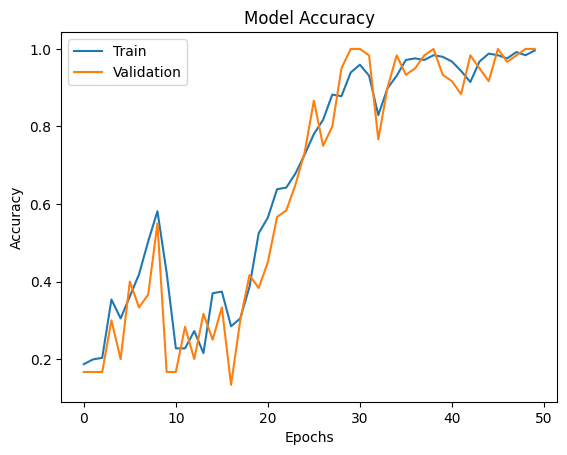

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Nhandientien.h5")

In [ ]:
model_nhandien=load_model('Nhandientien.h5')

1/1 [==============================] - 0s 46ms/step
100k


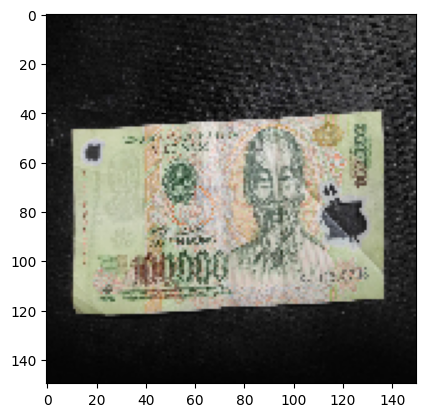

In [ ]:
img=load_img("/content/drive/MyDrive/test3/100k.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='100k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='20k'
if round(result[0][3])==1:
  prediction='500k'
if round(result[0][4])==1:
  prediction='50k'
if round(result[0][4])==1:
  prediction='5k'
print(prediction)

1/1 [==============================] - 0s 47ms/step
10k


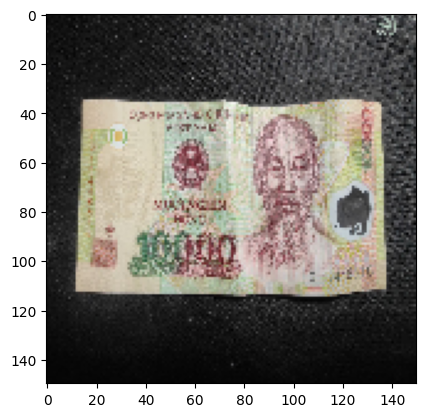

In [ ]:
img=load_img("/content/drive/MyDrive/test3/10k.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='100k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='20k'
if round(result[0][3])==1:
  prediction='500k'
if round(result[0][4])==1:
  prediction='50k'
if round(result[0][4])==1:
  prediction='5k'
print(prediction)

1/1 [==============================] - 0s 42ms/step
20k


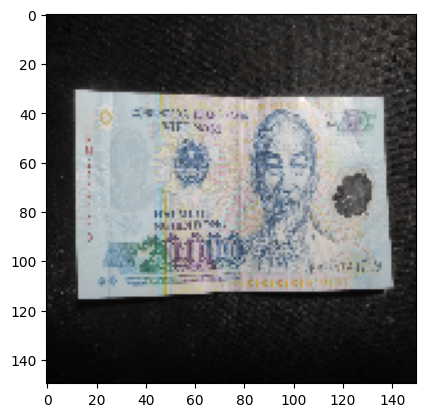

In [ ]:
img=load_img("/content/drive/MyDrive/test3/20k.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='100k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='20k'
if round(result[0][3])==1:
  prediction='500k'
if round(result[0][4])==1:
  prediction='50k'
if round(result[0][4])==1:
  prediction='5k'
print(prediction)

1/1 [==============================] - 0s 47ms/step
500k


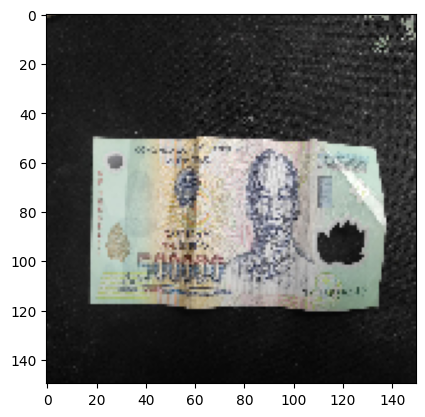

In [ ]:
img=load_img("/content/drive/MyDrive/test3/500k.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='100k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='20k'
if round(result[0][3])==1:
  prediction='500k'
if round(result[0][4])==1:
  prediction='50k'
if round(result[0][4])==1:
  prediction='5k'
print(prediction)

1/1 [==============================] - 0s 42ms/step
5k


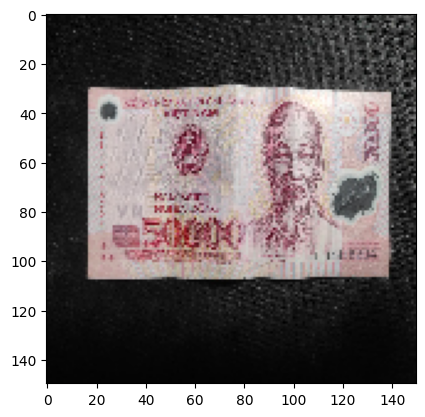

In [ ]:
img=load_img("/content/drive/MyDrive/test3/50k.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='100k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='20k'
if round(result[0][3])==1:
  prediction='500k'
if round(result[0][4])==1:
  prediction='50k'
if round(result[0][4])==1:
  prediction='5k'
print(prediction)

1/1 [==============================] - 0s 62ms/step
5k


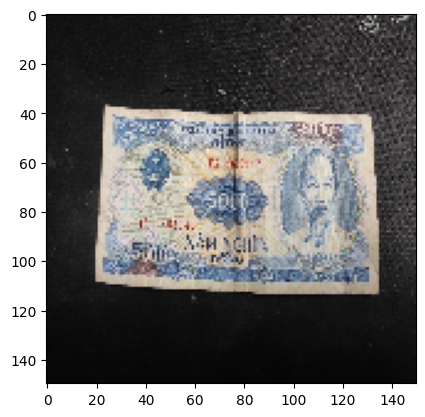

In [ ]:
img=load_img("/content/drive/MyDrive/test3/5k.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='100k'
if round(result[0][1])==1:
  prediction='10k'
if round(result[0][2])==1:
  prediction='20k'
if round(result[0][3])==1:
  prediction='500k'
if round(result[0][4])==1:
  prediction='50k'
if round(result[0][4])==1:
  prediction='5k'
print(prediction)